This notebook uses the models from the notebooks "TrainBaseModel" and "TrainBaseModelAugmentation" to compare the effects of data augmentation.

## Import Libraries & Load Models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import roc_curve, auc
from data_loader import load_dir, create_dataset

2024-08-07 16:08:56.668144: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-07 16:08:56.682638: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-07 16:08:56.745443: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-07 16:08:56.793335: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-07 16:08:56.937540: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [11]:
model_aug = tf.keras.models.load_model('Models/BaseModelAugment.keras')
model = tf.keras.models.load_model('Models/BaseModel.keras')

## Load & Prepare Data

In [12]:
# define
classes = ['buildings', 'street']
train_dir = 'first_100/seg_train/seg_train'
test_dir = 'first_100/seg_test/seg_test'
max_images = 50  # Number of images per class

image_size=(224,224)
num_classes=2
batch_size=30

In [13]:
# load
train_images, train_labels = load_dir(train_dir, classes, max_images,image_size)
test_images, test_labels = load_dir(test_dir, classes, max_images,image_size)

test_ds = create_dataset(test_images, test_labels, batch_size=batch_size)

In [15]:
# predict
probs_aug=model_aug.predict(test_images)
probs_model=model.predict(test_images)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 246ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step


## Evaluate Models & Compare ROC

In [16]:
# ROC and AUCs
fpr_aug, tpr_aug, _ = roc_curve(test_labels, probs_aug)
fpr_model, tpr_model, _ = roc_curve(test_labels, probs_model)

roc_auc_aug = auc(fpr_aug, tpr_aug)
roc_auc_model = auc(fpr_model, tpr_model)

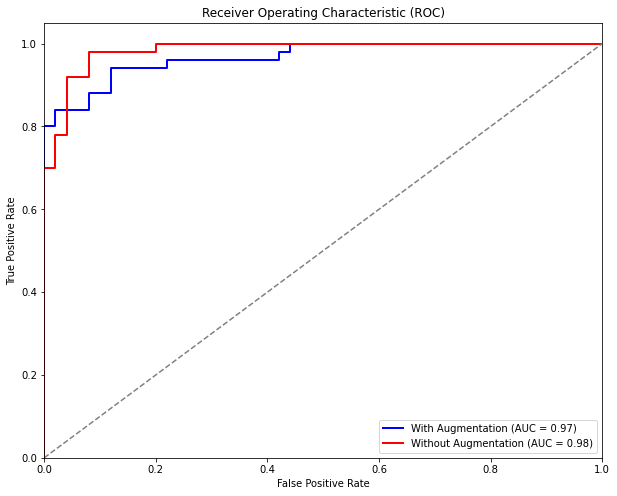

In [17]:
# plot
plt.figure(figsize=(10, 8))
plt.plot(fpr_aug, tpr_aug, color='blue', lw=2, label=f'With Augmentation (AUC = {roc_auc_aug:.2f})')
plt.plot(fpr_model, tpr_model, color='red', lw=2, label=f'Without Augmentation (AUC = {roc_auc_model:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

The model without augmentation performs better. The model with augmentation could use adjustments in the training duration and parameters to properly deal with the added complexity from augmentation. If given the appropriate epochs to train it has potential to overtake the model without augmentation.